In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Read the CSV file, skipping the first row (dataset names)
df = pd.read_csv("../../data/UC-UN/UC-diameter-density.csv", skiprows=1)

# Temperature mapping for UC data
temp_map_uc = {
    '300': '300°C',
    '600': '600°C'
}

# Create datasets dictionary
datasets_uc = {}

# Column mapping for UC data
# Density-UC-300: columns 0,1
# Density-UC-600: columns 2,3  
# Diameter-UC-300: columns 4,5
# Diameter-UC-600: columns 6,7

temperatures = ['300', '600']
density_cols = [0, 2]  # X columns for density data
diameter_cols = [4, 6]  # X columns for diameter data

# Extract density data and sort by X values
for i, temp in enumerate(temperatures):
    x_col = density_cols[i]
    y_col = x_col + 1
    
    x_data = pd.to_numeric(df.iloc[:, x_col], errors='coerce').dropna()
    y_data = pd.to_numeric(df.iloc[:, y_col], errors='coerce').dropna()
    min_len = min(len(x_data), len(y_data))
    
    if min_len > 0:
        # Create arrays and sort by X values
        x_vals = x_data.iloc[:min_len].values
        y_vals = y_data.iloc[:min_len].values
        
        # Sort both arrays based on X values
        sorted_indices = np.argsort(x_vals)
        x_sorted = x_vals[sorted_indices]
        y_sorted = y_vals[sorted_indices]
        
        datasets_uc[f'density_uc_{temp}'] = {
            'x': x_sorted,
            'y': y_sorted,
            'temp': temp_map_uc[temp]
        }

# Extract diameter data and sort by X values
for i, temp in enumerate(temperatures):
    x_col = diameter_cols[i]
    y_col = x_col + 1
    
    x_data = pd.to_numeric(df.iloc[:, x_col], errors='coerce').dropna()
    y_data = pd.to_numeric(df.iloc[:, y_col], errors='coerce').dropna()
    min_len = min(len(x_data), len(y_data))
    
    if min_len > 0:
        # Create arrays and sort by X values
        x_vals = x_data.iloc[:min_len].values
        y_vals = y_data.iloc[:min_len].values
        
        # Sort both arrays based on X values
        sorted_indices = np.argsort(x_vals)
        x_sorted = x_vals[sorted_indices]
        y_sorted = y_vals[sorted_indices]
        
        datasets_uc[f'diameter_uc_{temp}'] = {
            'x': x_sorted,
            'y': y_sorted,
            'temp': temp_map_uc[temp]
        }

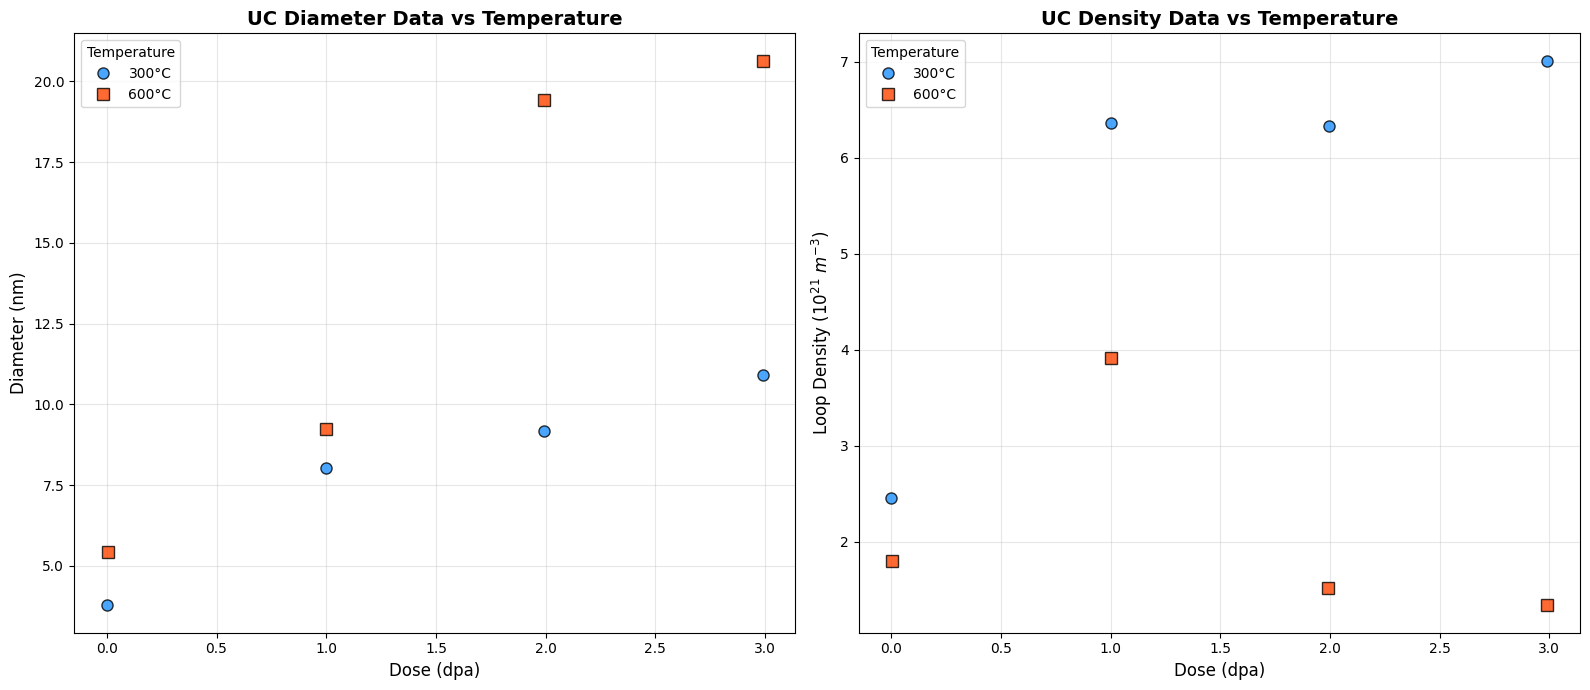

In [8]:
# Create two subplots for UC data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot colors and markers for UC data (using different colors for different temps)
plot_colors_uc = {
    '300': '#1E90FF',    # Dodger blue for 300°C
    '600': '#FF4500'     # Orange red for 600°C
}

# Distinct markers for each temperature
markers_uc = {
    '300': 'o',    # Circle for 300°C
    '600': 's'     # Square for 600°C
}

# Plot diameter data (UC)
ax1.set_title('UC Diameter Data vs Temperature', fontsize=14, fontweight='bold')
ax1.set_xlabel('Dose (dpa)', fontsize=12)
ax1.set_ylabel('Diameter (nm)', fontsize=12)

for temp in temperatures:
    key = f'diameter_uc_{temp}'
    if key in datasets_uc:
        data = datasets_uc[key]
        ax1.plot(data['x'], data['y'], marker=markers_uc[temp], 
                color=plot_colors_uc[temp], linestyle='None',
                label=f'{data["temp"]}', markersize=8, markeredgewidth=1,
                markeredgecolor='black', alpha=0.8)

ax1.legend(title='Temperature', fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot density data (UC)
ax2.set_title('UC Density Data vs Temperature', fontsize=14, fontweight='bold')
ax2.set_xlabel('Dose (dpa)', fontsize=12)
ax2.set_ylabel('Loop Density ($10^{21}$ $m^{-3}$)', fontsize=12)

for temp in temperatures:
    key = f'density_uc_{temp}'
    if key in datasets_uc:
        data = datasets_uc[key]
        ax2.plot(data['x'], data['y'], marker=markers_uc[temp], 
                color=plot_colors_uc[temp], linestyle='None',
                label=f'{data["temp"]}', alpha=0.8, linewidth=2, 
                markersize=8, markeredgewidth=1, markeredgecolor='black')

ax2.legend(title='Temperature', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()